# Report 

In [20]:
import ConfigParser
from my_suite_helpers.pdf_reader import read_to_clean
from my_suite_helpers.utils import dataset_genreator, precision, recall, f_measure
from my_suite_helpers.ATE_method import tf
from my_suite_helpers.term_grouping import term_grouping, jaro_sim
from my_suite_helpers.thd import thd
import timeit
import json
import ate
from os import listdir
import pandas as pd
import numpy as np

# GLOBAL
pdf_folder = "data/time"
txt_folder = "data/txt"
clean_txt_folder = "data/clean_txt"
golden_st_path = "hands-on/D22.txt"

In [16]:
reference_file_time = "hands-on/time-onto-paper/MyTimeOnto-Paper-manually-extracted-terms.csv"
terms_gs_df_time = pd.DataFrame.from_csv(reference_file_time, sep=';')
term_gs_agg_time= terms_gs_df_time.groupby(['term'])['num'].agg([np.sum])

terms_gs_df = pd.DataFrame.from_csv(golden_st_path, sep=';')
term_gs_agg = terms_gs_df.groupby(['term'])['num'].agg([np.sum])

orders = ['chrono', 'rev-chrono', 'bi-dir', 'random']
order = 'chrono'
num_input = len([f for f in listdir(clean_txt_folder)])
compare_to_c_value = True # c-value is very slow, so I disabled comparing

config = ConfigParser.ConfigParser()
config.readfp(open('config.ini'))
min_term_length = int(config.get('main', 'min_term_length'))
min_term_words = int(config.get('main', 'min_term_words'))
stopwords = json.loads(config.get('main', 'stopwords'))
term_patterns = json.loads(config.get('main', 'term_patterns'))

term_extractor = ate.TermExtractor(stopwords=stopwords, term_patterns=term_patterns, min_term_words=min_term_words,
                                   min_term_length=min_term_length)


C:\Users\kzorina\AppData\Local\Continuum\anaconda3\envs\python2.7\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
C:\Users\kzorina\AppData\Local\Continuum\anaconda3\envs\python2.7\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """


## Stage 1. Reading from PDF and cleaning

In [4]:
# time = 541.463303506 s
start = timeit.default_timer()
read_to_clean(pdf_folder, clean_txt_folder)
stop = timeit.default_timer()
print("Elapsed time: {} s".format(stop-start))

Stage 1. Reading from PDF and cleaning
error reading file ('data/time', 'TIME-1994-1(1)-paper-12.pdf'). Skipping it
error reading file ('data/time', 'TIME-1994-1(1)-paper-19.pdf'). Skipping it
error reading file ('data/time', 'TIME-1994-1(1)-paper-3.pdf'). Skipping it
error reading file ('data/time', 'TIME-1995-1(1)-paper-17.pdf'). Skipping it
error reading file ('data/time', 'TIME-1995-1(1)-paper-7.pdf'). Skipping it
error reading file ('data/time', 'TIME-1996-1(1)-paper-03.pdf'). Skipping it
error reading file ('data/time', 'TIME-1999-1(1)-paper-10.pdf'). Skipping it
error reading file ('data/time', 'TIME-1999-1(1)-paper-3.pdf'). Skipping it
error reading file ('data/time', 'TIME-1999-1(1)-paper-9.pdf'). Skipping it
error reading file ('data/time', 'TIME-2000-1(1)-paper-6.pdf'). Skipping it
error reading file ('data/time', 'TIME-2004-1(1)-paper-13.pdf'). Skipping it
error reading file ('data/time', 'TIME-2004-1(1)-paper-14.pdf'). Skipping it
Elapsed time: 465.03720292 s


All results are saved to clean_txt folder.
##### Elapsed time: 465 seconds

## Stage 2. Generating dataset

In [24]:
start = timeit.default_timer()
dataset = dataset_genreator(order, num_input, clean_txt_folder)
stop = timeit.default_timer()
print("Elapsed time: {} s".format(stop-start))

Getting 424 docs in chrono order
Elapsed time: 4.08906234897 s


Generator accepts 'chrono', 'rev-chrono', 'bi-dir', 'random' orders.
##### Elapsed time: 4.08906234897 seconds for 424 docs

## Stage 3. ATE Method

I used tf for terms extraction.

In [23]:
compare_to_c_value = False
num_input = len([f for f in listdir(clean_txt_folder)])

In [25]:
terms = term_extractor.extract_terms(dataset)
print("Starting ATE on extracted terms...")
start_my_ate = timeit.default_timer()
my_ate_terms_df = tf(terms)
stop_my_ate = timeit.default_timer()
print("Elapsed time for my ATE Method: {} s".format(stop_my_ate - start_my_ate))
if num_input == len([f for f in listdir(clean_txt_folder)]):
    print("Metrics with golden standart from {}".format(golden_st_path))
    print("Precision = {}".format(precision(my_ate_terms_df['term'].tolist(), term_gs_agg.index.values.tolist())))
    print("Recall = {}".format(recall(my_ate_terms_df['term'].tolist(), term_gs_agg.index.values.tolist())))
    print("F measure = {}".format(f_measure(my_ate_terms_df['term'].tolist(), term_gs_agg.index.values.tolist())))

else:
    print("Not enough documents to check precision with GS. \n ")
    # print("Precision = {}".format(precision(my_ate_terms_df['term'].tolist(), term_gs_agg_time.index.values.tolist())))
    # print("Recall = {}".format(recall(my_ate_terms_df['term'].tolist(), term_gs_agg_time.index.values.tolist())))
    # print("F measure = {}".format(f_measure(my_ate_terms_df['term'].tolist(), term_gs_agg_time.index.values.tolist())))
print("")
if compare_to_c_value:
    print("Start measurements for comparison")
    start = timeit.default_timer()
    c_value_terms = term_extractor.c_values(terms, trace=True)
    stop = timeit.default_timer()
    print("Elapsed time for reference c-value Method: {} s".format(stop - start))
    terms_cvalue_df = pd.DataFrame(c_value_terms)
    if num_input == len([f for f in listdir(clean_txt_folder)]):

        print("Metrics with golden standart from {}".format(golden_st_path))
        print("Precision = {}".format(precision(terms_cvalue_df[0].tolist(), term_gs_agg.index.values.tolist())))
        print("Recall = {}".format(recall(terms_cvalue_df[0].tolist(), term_gs_agg.index.values.tolist())))
        print("F measure = {}".format(f_measure(terms_cvalue_df[0].tolist(), term_gs_agg.index.values.tolist())))
    else:
        print("Not enough documents to check precision with GS. \n ")


Processed 135079 linesStarting ATE on extracted terms...


KeyboardInterrupt: 

#### Compare on smaller file (as c-value is working too long)

In [13]:
import re
fp = open("hands-on/time-onto-paper/TimeOnto-Paper.txt", "r")
doc_txt = fp.read() 
fp.close()
doc_txt = unicode(doc_txt, "utf-8", errors='ignore')
doc_txt = re.sub(r'et +al\.', 'et al', doc_txt)
doc_txt = re.split(r'[\r\n]', doc_txt)
terms = term_extractor.extract_terms(doc_txt)
golden_st_path = "hands-on/time-onto-paper/MyTimeOnto-Paper-manually-extracted-terms.csv"

1 / 2707 ONTOLOGIES OF TIME: REVIEW AND TRENDS
2 / 2707 Time, as a phenomenon, has been in the focus of scientific thought from ancient times.
3 / 2707 It continues to be an important subject of research in many disciplines due to its importance as a basic aspect for understanding and formally representing change.
4 / 2707 The goal of this analytical review is to find out if the formal representations of time developed to date suffice to the needs of the basic and applied research in Computer Science, and in particular within the Artificial Intelligence and Semantic Web communities.
5 / 2707 To analyze if the existing basic theories, models, and implemented ontologies of time cower these needs well, the set of the features of time has been extracted and appropriately structured using the paper collection of the TIME Symposia series as the document corpus.
6 / 2707 This feature set further helped to structure the comparative review and analysis of the most prominent temporal theories.
7

65 / 2707 * The relative termhood difference value was computed as
66 / 2707 Hence, the termhoods were pair-wise compared using thd / thdr metric.
67 / 2707 The results are presented in Table 1.
68 / 2707 The analysis of the results presented in Table 1 and Fig.
69 / 2707 1 reveals:
70 / 2707 * Termhood saturation.
71 / 2707 Starting from the 1994-2009 collection slice, the number of the terms retained in the termhoods does not grow similarly to the earlier slices (Fig.
72 / 2707 1(a)).
73 / 2707 This fact indicates that the termhoods became saturated in terms  i.e.
74 / 2707 any reasonable addition of the relevant papers to the collection will not substantially change the terminological footprint of the entire collection.
75 / 2707 This indication is further supported by the behaviour of the thd curve in Fig.
76 / 2707 1(b).
77 / 2707 Indeed, for 2009, 2010, 2012, 2013 slices, the termhood difference is comparable to or even below the score significance threshold eps.
78 / 2707 Hence,

300 / 2707 49.83
301 / 2707 calendar schema
302 / 2707 ?
303 / 2707 46.25
304 / 2707 temporal representation
305 / 2707 ?
306 / 2707 41.00
307 / 2707 temporal reasoning
308 / 2707 ?
309 / 2707 40.00
310 / 2707 freeze quantifier
311 / 2707 ?
312 / 2707 37.73
313 / 2707 fuzzy interval
314 / 2707 ?
315 / 2707 36.36
316 / 2707 xml document
317 / 2707 ?
318 / 2707 36.00
319 / 2707 crisp interval
320 / 2707 ?
321 / 2707 34.00
322 / 2707 satisfiability problem
323 / 2707 ?
324 / 2707 Based on this classification, the taxonomy of temporal features has been further manually developed as shown in Fig.
325 / 2707 3.
326 / 2707 The authenticity of the names was preserved from the abovementioned list to a maximal extent.
327 / 2707 It would be also wrong to state that the taxonomy covers all the features of time mentioned in the literature completely.
328 / 2707 Some fragments are also questionable in terms of semantics from the ontology engineering point of view.
329 / 2707 However, it may be stat

456 / 2707 The least specific among the theories regarding the density of their model is [Halpern and Shoham (1991)].
457 / 2707 They state that their framework may be generally applied to discrete, rational (dense), and continuous domains.
458 / 2707 Prior (1967) also covers sparse and dense time models by offering different flavours of his tense logic.
459 / 2707 Dense time model having rationals as its domain is postulated by Alur et al (1996) and Koubarakis (1992).
460 / 2707 Alur et al (1996) define a language that can constrain the time difference between events only with finite, yet arbitrary, precision.
461 / 2707 Koubarakis (1992) considers time points identified with the rational numbers, mentioning however that his results still hold if points are identified using reals.
462 / 2707 Among the theories for which the continuity of time is a key premise are: Lamport(1978), Allen (1983), Pinto (1994), Kowalski and Sergot (1986), McDermott(1982), Iwasaki et al (1995).
463 / 2707 T

528 / 2707 Allen (1983)
529 / 2707 Pinto (1994)
530 / 2707 - Kowalski & Sergot (1986)
531 / 2707 Prior (1967)
532 / 2707 McDermott (1982)
533 / 2707 Sandewall (1995)
534 / 2707 Halpern & Shoham (1991)
535 / 2707 Bacchus & Kabanza (1998)
536 / 2707  - Alur et al (1996)
537 / 2707 Williams (1986)
538 / 2707 Koubarakis (1992)
539 / 2707 Iwasaki et al (1995)
540 / 2707 Ermolayev et al (2008a)
541 / 2707 Synthetic Theory
542 / 2707 Unbounded (O), Bounded (C), Bounded at the Beginning (Z)
543 / 2707 O
544 / 2707 Z
545 / 2707 OCZ
546 / 2707 O
547 / 2707 OZ
548 / 2707 OC
549 / 2707 OCZ
550 / 2707 O
551 / 2707 O
552 / 2707 O
553 / 2707 OZ
554 / 2707 Anisotropy
555 / 2707 +
556 / 2707 +
557 / 2707 +
558 / 2707 +
559 / 2707 +
560 / 2707 +
561 / 2707 Density: Discrete(I), Dense(D), Continuous (R)
562 / 2707 R
563 / 2707 R
564 / 2707 R
565 / 2707 IDR
566 / 2707 R
567 / 2707 ID
568 / 2707 IDR
569 / 2707 D
570 / 2707 D
571 / 2707 R
572 / 2707 I
573 / 2707 IDR
574 / 2707 Partitioning
575 / 2707 +
576 

697 / 2707 More formally, he states that the time interval associated with an episode el is maximal if there exists no other episode e2 with the same value of the state variable such that els temporal extent is a proper sub-interval of e2s extent.
698 / 2707 Calendar Systems
699 / 2707 A few of the reviewed theories propose their structures for calendars and calendar systems.
700 / 2707 Allen (1983) denotes a date line as any representation consisting of a fully ordered set of date values mapped to time values and a date comparison operation.
701 / 2707 He then suggests that a simple calendar could be designed using a date line comprising: (i) date values as ordered triples of integers, representing year, month (1-12), and day (1-31); (ii) the comparison operation which orders date triples in the obvious manner.
702 / 2707 Allen allows different date lines in a system, reflecting the existence and use of different calendars.
703 / 2707 If two intervals are dated by the same date line, 

899 / 2707 overlap OR overlapped-by
900 / 2707 SubintervalOf
901 / 2707 during OR starts OR finishes
902 / 2707 UnionOf*
903 / 2707 contains(I1, I2) AND  contains(I1, Ik)
904 / 2707 * UnionOf is, pragmatically, a relation with the arity higher than 2.
905 / 2707 Fuzzy Interval to Interval Relations
906 / 2707 Among the theories under this review, the only theory of time offering a fuzzy extension of interval to interval relationships is [Ermolayev et al (2008a)].
907 / 2707 An earlier approach too representing vagueness in temporal knowledge has been proposed by [Nagyp?l and Motik (2003)].
908 / 2707 The extension by Ermolayev et al (2008a) first denotes a fuzzy time interval as (see also the discussion of temporal intervals in section 3.2).
909 / 2707 Further they introduce fuzzy binary relations between fuzzy intervals by adding a likely modifier to Allen style relations.
910 / 2707 Fig.
911 / 2707 10 pictures the example of specifying the LikelyMeets relation:, compared to the Likel

1076 / 2707 Temporal Description Logics (see Fig.
1077 / 2707 13 for the most frequently mentioned logics by the TIME community) offer some degree of interaction between Description Logics and Temporal Logics constructors.
1078 / 2707 Fig.
1079 / 2707 13.
1080 / 2707 Temporalized description logics
1081 / 2707 As remarked in [Lutz et al (2008)], Temporal Description Logics are mainly focused on the representation of the evolution of objects along linear discrete time which is bounded in the past and unbounded towards the future, but there are complexity results for the natural branching model of time, which consists of infinite trees where the root represents the current moment of time and branches represent possible histories (or possible futures).
1082 / 2707 Further, interval-based temporal structures are dealt with in Interval Description Logics, as proposed in [Schmiedel (1990)]; [Artale and Franconi (1998)].
1083 / 2707 Apart from referencing an abstract time structure, there is 

1138 / 2707 TDLs offer additional expressive capabilities over non-temporal DLs and retain decidability (with an appropriate selection of allowable constructs).
1139 / 2707 However, they require extending OWL syntax and semantics with the additional temporal constructs (similar to property labelling introduced in [Gutierrez et al (2005)]).
1140 / 2707 GFO-Time [Baumann et al (2012)] offers a representation of time using First Order Logic axioms that are covering time and point algebras.
1141 / 2707 Representing information concerning specific time points requires the support for concrete domains, resulting in the proliferation of objects [Artale and Franconi (2000)].
1142 / 2707 Concrete domains [Lutz (2003)] introduce data types and operators based on an underlying domain (such as decimal numbers).
1143 / 2707 The concrete domains approach requires introducing additional data types and operators to OWL.
1144 / 2707 TOWL [Frasinkar et al (2010)] is an approach combining 4D fluents with

1205 / 2707 A plug-in for the Protege editor supporting editing of n-ary based temporal ontologies is presented at [Santos et al (2011)].
1206 / 2707 A similar tool for both for 4D fluents and n-ary relations has been proposed in [Preventis et al (2012)].
1207 / 2707 In [Motik (2012)] RDF and OWL supporting n-ary relations are extended with temporal representation.
1208 / 2707 Querying support is also proposed and implemented.
1209 / 2707 The n-ary relations approach combined with SWRL reasoning rules are used in the SWRL-Temporal ontology for representing quantitatively defined temporal information [OConnor and Das (2011)].
1210 / 2707 CNTRO [Cui et al (2010)] adopts a similar approach, combined with the concepts of time defined in OWL-Time.
1211 / 2707 Batres et al, (2005) were among the first to encode the 4D (perdurants) using OWL for translating ISO 15926 part 2 concepts into OWL by applying reification, although OWL semantics differs from that of ISO 15926.
1212 / 2707 To cope wi

1379 / 2707 The complete (non-proprietary) content of the Cyc knowledge base is available by registration at http://www.cyc.com/platform/researchcyc
1380 / 2707 Open Cyc  public
1381 / 2707 Research Cyc  by registration
1382 / 2707 Enterprise Cyc proprietary
1383 / 2707 SUMO Temporal
1384 / 2707 http://www.ontologyportal.org/
1385 / 2707 SUO-KIF
1386 / 2707 http://sigmakee.cvs.sourceforge.net/viewvc/sigmakee/KBs/Merge.kif
1387 / 2707 source and copyright owned by IEEE
1388 / 2707 DOLCE
1389 / 2707 http://www.loa.istc.cnr.it/old/DOLCE.html
1390 / 2707 OWL
1391 / 2707 Version 3.9 of DOLCE2.1-Lite-Plus: http://www.loa.istc.cnr.it/old/ontologies/DLP_397.owl
1392 / 2707 public
1393 / 2707 BFO
1394 / 2707 http://jowl.ontologyonline.org/bfo.html
1395 / 2707 OWL-DL
1396 / 2707 http://ifomis.uni-saarland.de/bfo/owl
1397 / 2707 public
1398 / 2707 GFO-BT
1399 / 2707 http://www.onto-med.de/ontologies/gfo/
1400 / 2707 OWL
1401 / 2707 http://www.onto-med.de/ontologies/gfo.owl
1402 / 2707 public
1403

1540 / 2707 OWL-Time [Hobbs and Pan (2004)], formerly DAML-Time, the current W3C recommendation [Hobbs and Pan (2006)], has been developed for describing the temporal content of Web pages and the temporal properties of Web services.
1541 / 2707 OWL-Time is also available in its simplified form OWL-Time-Entry.
1542 / 2707 It also has separate extensions:
1543 / 2707 * TimeZone  specifies time shifts for different geographical zones
1544 / 2707 * TemporalAggregates  provides the means to model regular periodic temporal structures [Pan (2005)]
1545 / 2707 OWL-Time is the underlying namespace for the Time Markup Language (TimeML, [Hobbs and Pustejovsky (2003)]).
1546 / 2707 Besides that, OWL-Time is extensively reused in other ontologies as their temporal module.
1547 / 2707 OWL-Time ontology is based on the introduction of the two subclasses of the TemporalEntity concept: Instant and Interval.
1548 / 2707 Intervals are understood as the things with extent having interior points.
1549 / 27

1615 / 2707 PSI-Time is one of the core ontologies in the PSI Suite providing temporal elements for the models of dynamic engineering design processes [Ermolayev et al (2006)].
1616 / 2707 These models have been used in process simulations aimed to assess performance in microelectronic design.
1617 / 2707 PSI-Time ontology implements the medium expressivity model of time [Ermolayev et al (2008a)] which means that fuzziness of time is not included in the ontology.
1618 / 2707 In this model time is considered open at both ends, linear, discrete, and anisotropic.
1619 / 2707 The time point of the present is introduced, which slides on the time line towards the future.
1620 / 2707 The ontology implements both relativist and absolutist views on the relationships among time elements.
1621 / 2707 The ontology comprises the specification of the point-to-point, point-to-interval and interval-to-interval relationships.
1622 / 2707 The relationships between intervals are denoted in the spirit of 

1814 / 2707 FC
1815 / 2707       - Fuzzy(F), Crisp (C)
1816 / 2707 C
1817 / 2707 C
1818 / 2707 C
1819 / 2707 C
1820 / 2707 C
1821 / 2707 C
1822 / 2707 FC
1823 / 2707 +
1824 / 2707    - Periodic Temporal Elements
1825 / 2707 *8
1826 / 2707 +
1827 / 2707 Notes:
1828 / 2707 *6 Temporal Region, Time Interval subsuming to Temporal Region
1829 / 2707 *7 Two instances of Time-Point: Infinite-Past and Infinite-Future
1830 / 2707 *8 (Regular-)Non-Convex-Time-Interval
1831 / 2707 Temporal Structures
1832 / 2707 PI
1833 / 2707    - Point(P)-, Interval(I)-Based
1834 / 2707 PI
1835 / 2707 I
1836 / 2707 PI
1837 / 2707 I
1838 / 2707 PI
1839 / 2707 P
1840 / 2707 PI
1841 / 2707 PI
1842 / 2707 +
1843 / 2707    - Temporal Segments
1844 / 2707 +
1845 / 2707 +
1846 / 2707 +
1847 / 2707    - Temporal Periods
1848 / 2707 *9
1849 / 2707 *10
1850 / 2707 +
1851 / 2707 +
1852 / 2707    - Calendars
1853 / 2707 iCal
1854 / 2707 +
1855 / 2707 iCal
1856 / 2707 Notes:
1857 / 2707 *9 In the TemporalAggregates extensio

2144 / 2707 As summarized in Table 10, the analysis of the coverage of the temporal features by these ontologies revealed that:
2145 / 2707 * There is no a single ontology that covers all the features
2146 / 2707 * All the ontologes taken together do not satisfactorily cover some features: (i) density of time; (ii) relaxed linearity of time; (iii) scale factors; (iv) proper and periodic subintervals; (v) temporal measures and clocks
2147 / 2707 * Some of the ontologies offer a unique contribution to the coverage of certain features
2148 / 2707 The results of the presented analytical review hint that:
2149 / 2707 * The available temporal logics and languages possess sufficient expressive power for potentially covering the temporal features demanded by the community sentiment
2150 / 2707 * A cross-disciplinary effort is required to address the features not covered by the existing ontologies of time.
2151 / 2707 For example, the results in formal verification and distributed run-time syst

2330 / 2707 (2005): Temporal RDF.
2331 / 2707 2nd European Semantic Web Conference (ESWC05), pp.
2332 / 2707 93107.
2333 / 2707 Halpern, J.Y., Shoham, Y.
2334 / 2707 (1991): A Propositional Modal Logic of Time Intervals.
2335 / 2707 J. ACM 38(4), pp.
2336 / 2707 935962.
2337 / 2707 Harel, E.; Lichtenstein, O.; Pnueli, A.
2338 / 2707 (1990): Explicit clock temporal logic.
2339 / 2707 5thAnnual Symp.
2340 / 2707 on Logic in Computer Science, pp.
2341 / 2707 402413.
2342 / 2707 Harris, S.; Seaborne, A.
2343 / 2707 (2013): SPARQL 1.1 Query Language for RDF.
2344 / 2707 W3C Recommendation 21 March 2013.
2345 / 2707 Hobbs, J. R.; Pan, F. (2004): An Ontology of Time for the Semantic Web.
2346 / 2707 ACM Transactions on Asian Language Processing (TALIP): Special issue on Temporal Information Processing, 3(1), pp.
2347 / 2707 6685.
2348 / 2707 Hobbs, J.R.; Pan, F. (2006) Time Ontology in OWL.
2349 / 2707 Ontology Engineering Patterns Task Force of the Semantic Web Best Practices and Deployment 

2513 / 2707 ; Plexousakis, D. (2011): PROTON: A prolog reasoner for temporal ontologies in OWL.
2514 / 2707 Expert Systems with Applications, 38(12), pp.
2515 / 2707 1466014667.
2516 / 2707 Pinto, J.
2517 / 2707 (1994): Temporal Reasoning in the Situation Calculus.
2518 / 2707 PhD thesis, University of Toronto.
2519 / 2707 Pnueli, A.
2520 / 2707 (1997): The temporal logic of programs.
2521 / 2707 18th Annual Symp.
2522 / 2707 on Foundations of Computer Science, pp.
2523 / 2707 4657.
2524 / 2707 Pratt, V. (1976): Semantical Considerations on Floyd-Hoare Logic.
2525 / 2707 17th Annual IEEE Symposium on Foundations of Computer Science, pp.
2526 / 2707 109121.
2527 / 2707 Preventis, A.; Polyxeni, M.; Petrakis, E.G.M.
2528 / 2707 ; Batsakis, S. (2012): CHRONOS: A Tool for Handling Temporal Ontologies in Prot?g?.
2529 / 2707 IEEE 24th Intl Conf.
2530 / 2707 on Tools with Artificial Intelligence (ICTAI12), 1, pp.
2531 / 2707 460467.
2532 / 2707 Preventis, A.; Petrakis, E.G.M.
2533 / 2707 ; Ba

2695 / 2707 ?
2696 / 2707 ?
2697 / 2707 6
2698 / 2707      Vadim Ermolayev, Sotiris Batsakis, Natalya Keberle, Olga Tatarintseva, and Grigoris Antoniou
2699 / 2707 5
2700 / 2707 	Ontologies of Time: Review and Trends
2701 / 2707 International Journal of Computer Science and Applications,
2702 / 2707 ?Technomathematics Research Foundation
2703 / 2707 Vol.
2704 / 2707 XX, No.
2705 / 2707 XX, pp.
2706 / 2707 XXX  XXX, 20XX
2707 / 2707 1


In [14]:
print("Starting ATE on extracted terms...")
start_my_ate = timeit.default_timer()
my_ate_terms_df = tf(terms)
stop_my_ate = timeit.default_timer()
print("Elapsed time for my ATE Method: {} s".format(stop_my_ate - start_my_ate))

print("Metrics with golden standart from {}".format(golden_st_path))
print("Precision = {}".format(precision(my_ate_terms_df['term'].tolist(), term_gs_agg.index.values.tolist())))
print("Recall = {}".format(recall(my_ate_terms_df['term'].tolist(), term_gs_agg.index.values.tolist())))
print("F measure = {}".format(f_measure(my_ate_terms_df['term'].tolist(), term_gs_agg.index.values.tolist())))
print("")

print("Start measurements for comparison")
start = timeit.default_timer()
c_value_terms = term_extractor.c_values(terms, trace=True)
stop = timeit.default_timer()
print("Elapsed time for reference c-value Method: {} s".format(stop - start))
terms_cvalue_df = pd.DataFrame(c_value_terms)
print("Metrics with golden standart from {}".format(golden_st_path))
print("Precision = {}".format(precision(terms_cvalue_df[0].tolist(), term_gs_agg.index.values.tolist())))
print("Recall = {}".format(recall(terms_cvalue_df[0].tolist(), term_gs_agg.index.values.tolist())))
print("F measure = {}".format(f_measure(terms_cvalue_df[0].tolist(), term_gs_agg.index.values.tolist())))


Starting ATE on extracted terms...
2428
Elapsed time for my ATE Method: 0.165914150476 s
Metrics with golden standart from hands-on/time-onto-paper/MyTimeOnto-Paper-manually-extracted-terms.csv
Precision = 0.262355848435
Recall = 0.00141646839074
F measure = 0.00281772379229

Start measurements for comparison
h j freq= 1  cvalue= 1.0986122886681098
p j freq= 1  cvalue= 1.0986122886681098
b r freq= 1  cvalue= 1.0986122886681098
b c freq= 1  cvalue= 1.0986122886681098
d f freq= 1  cvalue= 1.0986122886681098
r j freq= 1  cvalue= 1.0986122886681098
v s freq= 1  cvalue= 1.0986122886681098
d r freq= 1  cvalue= 1.0986122886681098
 t  freq= 1  cvalue= 1.0986122886681098
e a freq= 1  cvalue= 1.0986122886681098
j r freq= 1  cvalue= 1.0986122886681098
j g freq= 1  cvalue= 1.0986122886681098
e m freq= 1  cvalue= 1.0986122886681098
 cui freq= 1  cvalue= 0.0
c  i freq= 3  cvalue= 4.1588830833596715
 kim freq= 1  cvalue= 0.0
p  i freq= 4  cvalue= 5.545177444479562
 noy freq= 1  cvalue= 1.386294361119

time period freq= 1  cvalue= 0.0
time models freq= 3  cvalue= 4.795790545596741
span entity freq= 2  cvalue= 4.795790545596741
date values freq= 3  cvalue= 7.193685818395112
text mining freq= 1  cvalue= 2.3978952727983707
rule system freq= 1  cvalue= 2.3978952727983707
relations r freq= 1  cvalue= 0.0
binary ones freq= 1  cvalue= 2.3978952727983707
first slice freq= 1  cvalue= 2.3978952727983707
time in psi freq= 1  cvalue= 2.3978952727983707
t mcdermott freq= 1  cvalue= 2.3978952727983707
c typically freq= 1  cvalue= 2.3978952727983707
bfo  masolo freq= 1  cvalue= 2.3978952727983707
finite sets freq= 1  cvalue= 0.0
future work freq= 1  cvalue= 2.3978952727983707
tense logic freq= 1  cvalue= -0.5994738181995927
fuzzy logic freq= 1  cvalue= 2.3978952727983707
facts leads freq= 1  cvalue= 0.0
days period freq= 1  cvalue= 0.0
extra rules freq= 1  cvalue= 2.3978952727983707
term scores freq= 1  cvalue= 2.3978952727983707
fuzzy match freq= 1  cvalue= 2.3978952727983707
fuzzy model freq= 1  

nary relation freq= 7  cvalue= 11.285777172830763
logics  pratt freq= 1  cvalue= 0.0
reusable time freq= 4  cvalue= 5.1298987149230735
digital music freq= 2  cvalue= 2.5649493574615367
discrete part freq= 1  cvalue= 2.5649493574615367
discrete time freq= 2  cvalue= 2.5649493574615367
specific sets freq= 1  cvalue= 2.5649493574615367
special issue freq= 1  cvalue= 2.5649493574615367
distinct name freq= 1  cvalue= 2.5649493574615367
stable period freq= 1  cvalue= 2.5649493574615367
simpler forms freq= 1  cvalue= 0.0
narrower view freq= 1  cvalue= 2.5649493574615367
triple stores freq= 7  cvalue= 17.954645502230758
ancient times freq= 3  cvalue= 7.694848072384611
circular view freq= 1  cvalue= 2.5649493574615367
time ontology freq= 5  cvalue= 8.62755692964335
toql  baratis freq= 2  cvalue= 5.1298987149230735
class company freq= 2  cvalue= 2.5649493574615367
time elements freq= 3  cvalue= 5.1298987149230735
big time line freq= 1  cvalue= 2.5649493574615367
work by prior freq= 1  cvalue= 2.

rdf blank node freq= 1  cvalue= 0.0
concise manner freq= 1  cvalue= 2.6390573296152584
finishing at e freq= 1  cvalue= 2.6390573296152584
region of time freq= 1  cvalue= 2.6390573296152584
right endpoints freq= 1  cvalue= 2.70805020110221
proton  terziev freq= 1  cvalue= 2.70805020110221
other positions freq= 1  cvalue= 2.70805020110221
following forms freq= 1  cvalue= 2.70805020110221
sampled version freq= 1  cvalue= 2.70805020110221
basic primitive freq= 1  cvalue= 2.70805020110221
knowledge bases freq= 1  cvalue= 0.0
formal ontology freq= 2  cvalue= 0.0
basic functions freq= 1  cvalue= 2.70805020110221
time coordinate freq= 1  cvalue= 0.0
time properties freq= 2  cvalue= 2.70805020110221
time difference freq= 2  cvalue= 2.70805020110221
time of writing freq= 1  cvalue= 2.70805020110221
realtime logics freq= 2  cvalue= 5.41610040220442
vadim ermolayev freq= 1  cvalue= 2.70805020110221
feature choices freq= 1  cvalue= 0.0
balanced choice freq= 1  cvalue= 2.70805020110221
simple calend

specific concept freq= 2  cvalue= 5.545177444479562
only assumptions freq= 1  cvalue= 2.772588722239781
logical formulae freq= 1  cvalue= 2.772588722239781
sparql  tappolet freq= 1  cvalue= 2.772588722239781
dynamic entities freq= 1  cvalue= 2.772588722239781
sotiris batsakis freq= 1  cvalue= 2.772588722239781
earlier approach freq= 1  cvalue= 2.772588722239781
circular fashion freq= 1  cvalue= 2.772588722239781
linear time line freq= 1  cvalue= 2.772588722239781
various attempts freq= 1  cvalue= 2.772588722239781
software program freq= 1  cvalue= 0.0
linear intervals freq= 1  cvalue= 2.772588722239781
specific domains freq= 1  cvalue= 2.772588722239781
ontology fitness freq= 1  cvalue= 2.772588722239781
computer systems freq= 1  cvalue= 2.772588722239781
concept subsumes freq= 1  cvalue= 0.0
 anagnostopoulos freq= 2  cvalue= 5.545177444479562
more time points freq= 1  cvalue= 2.772588722239781
control location freq= 1  cvalue= 2.772588722239781
convex intervals freq= 1  cvalue= 0.0
co

different aspects freq= 1  cvalue= 2.833213344056216
ternary relations freq= 1  cvalue= 0.0
structure of time freq= 1  cvalue= 2.833213344056216
strong likelihood freq= 1  cvalue= 2.833213344056216
collection slices freq= 1  cvalue= 0.0
static properties freq= 1  cvalue= 2.833213344056216
such restrictions freq= 1  cvalue= 2.833213344056216
cognitive science freq= 2  cvalue= 2.833213344056216
direction of time freq= 1  cvalue= 2.833213344056216
theory postulates freq= 1  cvalue= 2.833213344056216
community members freq= 2  cvalue= 5.666426688112432
specific duration freq= 1  cvalue= 2.833213344056216
support operators freq= 1  cvalue= 2.833213344056216
description logic freq= 2  cvalue= -0.7726945483789687
denotes something freq= 1  cvalue= 0.0
special intervals freq= 2  cvalue= 5.666426688112432
domain ontologies freq= 1  cvalue= 0.0
class granularity freq= 1  cvalue= 2.833213344056216
dynamic behaviour freq= 1  cvalue= 2.833213344056216
dynamical systems freq= 1  cvalue= 2.8332133440

arbitrary duration freq= 1  cvalue= 2.8903717578961645
appropriate method freq= 1  cvalue= 2.8903717578961645
extracted features freq= 1  cvalue= 2.8903717578961645
feature extraction freq= 1  cvalue= 0.0
first order theory freq= 1  cvalue= 2.8903717578961645
anisotropy of time freq= 3  cvalue= 8.671115273688493
fundamental aspect freq= 2  cvalue= 5.780743515792329
disjoint relations freq= 1  cvalue= 2.8903717578961645
 temporal elements freq= 1  cvalue= -0.9634572526320546
compound construct freq= 1  cvalue= 2.8903717578961645
mathematical sense freq= 1  cvalue= 2.8903717578961645
cohesive structure freq= 1  cvalue= 2.8903717578961645
logicbased calculus freq= 1  cvalue= 2.9444389791664403
termhood comparison freq= 1  cvalue= 0.0
fuzzy time interval freq= 2  cvalue= 2.9444389791664403
reference durations freq= 2  cvalue= 5.8888779583328805
nonconvex intervals freq= 1  cvalue= 2.9444389791664403
reasoning mechanism freq= 1  cvalue= 2.9444389791664403
general methodology freq= 1  cvalue

reasoning complexity freq= 1  cvalue= 0.0
reasoning frameworks freq= 1  cvalue= 2.995732273553991
intervals in psitime freq= 1  cvalue= 2.995732273553991
granularity property freq= 1  cvalue= 0.0
fuzzy time intervals freq= 1  cvalue= 2.995732273553991
a15refuzzy extension freq= 1  cvalue= 2.995732273553991
reification  buneman freq= 1  cvalue= 2.995732273553991
allowable constructs freq= 1  cvalue= 2.995732273553991
antique philosophers freq= 1  cvalue= 2.995732273553991
introduce data types freq= 1  cvalue= 2.995732273553991
alternative approach freq= 1  cvalue= 2.995732273553991
analysis of realtime freq= 1  cvalue= 2.995732273553991
relativist treatment freq= 1  cvalue= 2.995732273553991
ranges of properties freq= 1  cvalue= 0.0
akt support ontology freq= 2  cvalue= 5.991464547107982
range of granularity freq= 2  cvalue= 5.991464547107982
annotated properties freq= 1  cvalue= 0.0
 temporal colocation freq= 1  cvalue= 2.995732273553991
happenings ermolayev freq= 1  cvalue= 2.99573227

worst case complexity freq= 1  cvalue= 0.0
linear temporal logic freq= 1  cvalue= 0.0
nonmetric time points freq= 1  cvalue= 0.0
ontoelect methodology freq= 1  cvalue= 0.0
acalendarday subsumes freq= 1  cvalue= 3.044522437723423
corresponding classes freq= 1  cvalue= 3.044522437723423
quantitative problems freq= 1  cvalue= 3.044522437723423
unboundedness of time freq= 1  cvalue= 3.044522437723423
multiplicative factor freq= 1  cvalue= 3.044522437723423
logical formalization freq= 1  cvalue= 0.0
context of relativist freq= 1  cvalue= 3.044522437723423
qualitative relations freq= 5  cvalue= 12.178089750893692
periodic subintervals freq= 5  cvalue= 15.222612188617115
constraint propagator freq= 1  cvalue= 0.0
interval sequence  i0 freq= 1  cvalue= 3.044522437723423
considers time points freq= 1  cvalue= 3.044522437723423
provenance management freq= 1  cvalue= 3.044522437723423
integrity constraints freq= 1  cvalue= 0.0
observed natural laws freq= 1  cvalue= 3.044522437723423
objects of pr

semantic web conference freq= 3  cvalue= 4.7032413238937245
time zone ontology file freq= 1  cvalue= 3.1354942159291497
 in temporal structures freq= 1  cvalue= 3.1354942159291497
international symposium freq= 1  cvalue= 3.1354942159291497
 in temporal properties freq= 1  cvalue= 3.1354942159291497
classesobject properies freq= 2  cvalue= 0.0
timeinterval collection freq= 1  cvalue= 3.1354942159291497
closed world assumption freq= 1  cvalue= 3.1354942159291497
representations of time freq= 1  cvalue= 3.1354942159291497
w3c compliant solutions freq= 1  cvalue= 3.1354942159291497
other temporal entities freq= 1  cvalue= 3.1354942159291497
artificial intelligence freq= 20  cvalue= 59.574390102653844
representations concise freq= 1  cvalue= 3.1354942159291497
expressiveness in favor freq= 1  cvalue= 3.1354942159291497
temporal representation freq= 13  cvalue= 37.10334822182827
overlap or overlappedby freq= 1  cvalue= 3.1354942159291497
timedifference function freq= 1  cvalue= 3.13549421592

temporal description logic freq= 1  cvalue= -9.774289614064447
relations between instants freq= 1  cvalue= 3.258096538021482
example professional texts freq= 1  cvalue= 3.258096538021482
measure temporal distances freq= 1  cvalue= 3.258096538021482
different functional units freq= 1  cvalue= 3.258096538021482
arrangement of time points freq= 1  cvalue= 3.258096538021482
10th joint acliso workshop freq= 1  cvalue= 3.258096538021482
enterprise cyc proprietary freq= 1  cvalue= 3.258096538021482
axiomatic characterization freq= 1  cvalue= 3.258096538021482
standard datatype property freq= 1  cvalue= 3.258096538021482
firstorder temporal logics freq= 1  cvalue= 3.258096538021482
fuzziness in time instants freq= 2  cvalue= 6.516193076042964
use of temporal modalities freq= 1  cvalue= 3.258096538021482
ontology querying language freq= 1  cvalue= 0.0
temporal locations subsume freq= 1  cvalue= 3.258096538021482
polynomial time algorithms freq= 1  cvalue= 3.258096538021482
lineartime temporal l

reusabletime specifies convex freq= 1  cvalue= 3.367295829986474
definitions of interval start freq= 1  cvalue= 3.367295829986474
taxonomy of temporal features freq= 5  cvalue= 16.83647914993237
table7application areas dealt freq= 1  cvalue= 3.367295829986474
ranges of properties beginsat freq= 1  cvalue= 3.367295829986474
form of information resources freq= 1  cvalue= 3.367295829986474
implementations of ontologies freq= 1  cvalue= 3.367295829986474
incompleteness in facts leads freq= 1  cvalue= 3.367295829986474
nearlysimultaneously relation freq= 1  cvalue= 3.367295829986474
spatiotemporal query language freq= 1  cvalue= 3.367295829986474
temporal relation inferencing freq= 2  cvalue= 6.734591659972948
support for ternary relations freq= 1  cvalue= 3.367295829986474
temporal terminological logic freq= 1  cvalue= 3.367295829986474
international symposia series freq= 1  cvalue= 3.367295829986474
interval as opennesscloseness freq= 1  cvalue= 3.367295829986474
temporallyrelated collect

type property denoting propositions freq= 1  cvalue= 0.0
typed firstorder predicate calculus freq= 1  cvalue= 3.5553480614894135
spatiotemporal representation model freq= 1  cvalue= 3.5553480614894135
verification of distributed systems freq= 1  cvalue= 3.5553480614894135
semantic web information management freq= 1  cvalue= 3.5553480614894135
term recognition technique  frantzi freq= 1  cvalue= 3.5553480614894135
ontoelect methodology  tatarintseva freq= 1  cvalue= 3.5553480614894135
uniformsamplingmap concept subsumes freq= 1  cvalue= 3.5553480614894135
swrltemporal contains swrl buildins freq= 1  cvalue= 3.5553480614894135
sparqlbased temporal query language freq= 1  cvalue= 3.5553480614894135
psitime versus allens time interval freq= 1  cvalue= 3.5553480614894135
temporal ontology querying language freq= 1  cvalue= 3.5553480614894135
examples of temporal representation freq= 1  cvalue= 3.5553480614894135
interval temporal logics  moszkowski freq= 1  cvalue= 3.58351893845611
models o

#### Results for my ATE
Precision = 0.262355848435

Recall = 0.00141646839074

F measure = 0.00281772379229

##### Elapsed time: 0.165914150476 s
#### Results for reference implementation (C-value)
Precision = 0.262355848435

Recall = 0.00141646839074

F measure = 0.00281772379229

##### Elapsed time: 822.024772244 s

## Stage 4. Term grouping

In [28]:
dataset = dataset_genreator('random', 1, clean_txt_folder)
terms = term_extractor.extract_terms(dataset, verbose=False)
my_ate_terms_df = tf(terms)

Getting 1 docs in random order
803


In [47]:
print("Term length before grouping = {}".format(len(my_ate_terms_df)))
start = timeit.default_timer()
my_grouped_terms_df = term_grouping(my_ate_terms_df, 0.8)
stop = timeit.default_timer()
print("Term length after grouping = {}".format(len(my_grouped_terms_df)))
print("Elapsed time: {} s".format(stop-start))


Term length before grouping = 803


C:\Users\kzorina\AppData\Local\Continuum\anaconda3\envs\python2.7\lib\site-packages\ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Max similarity: 0.991869918699
Term length after grouping = 520
Elapsed time: 113.175545074 s


Term length before grouping = 803

Term length after grouping = 520
###### Elapsed time: 113.175545074 s

## Stage 5. THD Pipeline

In [57]:
start = timeit.default_timer()

for order in orders:
    #for grouping in (True, False): # too long for grouoping
    grouping = False
    terms_list = []
    thd_list = []
    thdr_list = []
    eps_list = []
    for inc in range(1,21):
        print("processing inc = {}, {} order, with grouping option {}".format(inc,order, grouping))
        dataset = dataset_genreator(order, inc, clean_txt_folder)
        terms = term_extractor.extract_terms(dataset, verbose=False)
        terms = tf(terms)
        # if grouping:
        #     terms = term_grouping(terms)
        terms_list.append(terms)
    for i in range(19):
        print("thd, thdr measures for D{}-D{}".format(i+1, i+2))
        thd_value, thdr_value, eps = thd(terms_list[i], terms_list[i+1])
        thd_list.append(thd_value)
        thdr_list.append(thdr_value)
        eps_list.append(eps)
        print("Thd = {} and thdr = {}".format(thd_value, thdr_value))
    plot_thd_thdr(thd_list, thdr_list, eps_list, order)

stop = timeit.default_timer()
print("Elapsed time: {} s".format(stop-start))

processing inc = 1, chrono order, with grouping option False
Getting 1 docs in chrono order
543
processing inc = 2, chrono order, with grouping option False
Getting 2 docs in chrono order
1110
processing inc = 3, chrono order, with grouping option False
Getting 3 docs in chrono order
1669
processing inc = 4, chrono order, with grouping option False
Getting 4 docs in chrono order
2336
processing inc = 5, chrono order, with grouping option False
Getting 5 docs in chrono order
2918
processing inc = 6, chrono order, with grouping option False
Getting 6 docs in chrono order
2918
processing inc = 7, chrono order, with grouping option False
Getting 7 docs in chrono order
2918
processing inc = 8, chrono order, with grouping option False
Getting 8 docs in chrono order
3341
processing inc = 9, chrono order, with grouping option False
Getting 9 docs in chrono order
3553
processing inc = 10, chrono order, with grouping option False
Getting 10 docs in chrono order
3916
processing inc = 11, chrono o

KeyboardInterrupt: 

In [54]:
import matplotlib.pyplot as plt
def plot_thd_thdr(thd, thdr, eps, title):
    plt.plot(thd)
    plt.plot(thdr)
    plt.plot(eps)
    plt.legend(["thd", "thdr", "eps"])
    plt.title(title)
    plt.show()

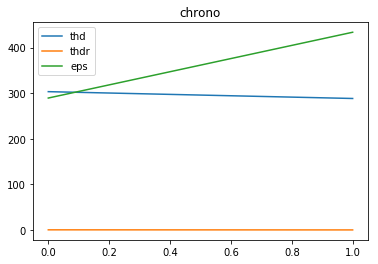

In [58]:
plot_thd_thdr(thd_list, thdr_list, eps_list, order)

## Stage 6. Taxonomy generator

In [26]:
#output_file =
start = timeit.default_timer()
dataset = dataset_genreator("random", 1, clean_txt_folder)
terms = term_extractor.extract_terms(dataset)#, verbose=False)
terms = tf(terms)

threshold_match = 0.9
threshold_combine = 0.6
to_merge = {}
to_combine = {}
for k in range(len(terms)):
    temp = terms.iloc[[k]]["term"]
    temp2 = terms.iloc[[k]]["term"].tolist()[0]
    term = str(terms.iloc[[k]]["term"].tolist()[0])
    merge_list = []
    combine_list = []
    for j in range(k+1,len(terms)):
        if jaro_sim(str(term), str(terms.iloc[[j]]["term"].tolist()[0])) > threshold_match:
            merge_list.append(str(terms.iloc[[j]]["term"].tolist()[0]))
            terms.drop(terms.index[j])
        elif jaro_sim(str(term), str(terms.iloc[[j]]["term"].tolist()[0])) > threshold_combine:
            combine_list.append(str(terms.iloc[[j]]["term"].tolist()[0]))
    if len(merge_list)>0:
        to_merge[term] = merge_list
    if len(combine_list) > 0:
        to_combine[term] = combine_list
stop = timeit.default_timer()
print("Elapsed time: {} s".format(stop-start))


Getting 1 docs in random order
1 / 225 Applying Local Search to Temporal Reasoning  J. Thornton, M. Beaumont and A. Sattar  School of Information Technology,  Griffith University Gold Coast,  Southport, Qld, Australia 4215  {j.thornton, m.beaumont, a.sattar}@mailbox.gu.edu.au  Abstract  Local search techniques have attracted considerable interest in the Artificial Intelligence (AI) community since the  development of GSAT [9] and the min-conflicts heuristic  [5] for solving large propositional satisfiability (SAT) problems and binary Constraint Satisfaction Problems (CSPs)  respectively.
2 / 225 Newer SAT techniques, such as the Discrete  Langrangian Method (DLM) [10], have significantly improved on GSAT and can also be applied to general constraint satisfaction and optimisation.
3 / 225 However, local search  has yet to be successfully employed in solving Temporal  Constraint Satisfaction Problems (TCSPs).
4 / 225 In this paper we argue that current formalisms for representing TCSPs a

55 / 225 These techniques search for a  consistent solution by eliminating basic relations from each  disjunctive constraint (or interval formula).
56 / 225 A significant  group of tractable sub-classes of IA have been identified  for which finding a path-consistent scenario is sufficient to  guarantee full consistency [7].
57 / 225 These sub-classes are subsets of the 213 possible interval formulas allowed in the full  IA.
58 / 225 IA algorithms exploit this information by searching for  path-consistent scenarios that only contain formulas from a  given tractable subset.
59 / 225 This is more efficient than searching for a single basic relation from each formula.
60 / 225 In addition, specialised ordering heuristics have been developed  that further improve the performance of backtracking on full  IA [11].
61 / 225 3.2.
62 / 225 Local Search and TCSPs  Unfortunately, little of this work is of direct relevance in  applying local search to IA.
63 / 225 The basic principle behind a  hill

123 / 225 Similarly, the longest path to oi (assuming  the worst ordering) is given by:  ¬(X − < Y − ) ∧ ¬(X − = Y − ) ∧ ¬(X − = Y + )∧  ¬(X − > Y + ) ∧ ¬(X + < Y + ) ∧ ¬(X + = Y + )  Using interval formulas, we can construct comparison trees  for each member of the subset of the 213 possible disjunctions that appear in a particular problem.
124 / 225 We term this type  X−  X−  X+  »» ?XXXX  »»»  XX  »  »  9  z >  X  <  =  Y−  ©  ?
125 / 225 ?
126 / 225 © ?
127 / 225 R  @  ¼  ©  (< )  (< )  <  = > Y+  H  ª?H  ¡  ?
128 / 225 ?
129 / 225 ?
130 / 225 ?
131 / 225 j>  H  < =  (> )  (> )  (> ) (> ) Y −  ?
132 / 225 ?
133 / 225 ¡  ª?
134 / 225 R  @  X + (< ) (< ) <  b  m  o  =  fi  >  di  ¡  ª?
135 / 225 R  @  <  s  =  eq  >  si  ¡  ª?
136 / 225 R  @  <  d  =  f  >  oi  ?
137 / 225 ?
138 / 225 (> ) (> ) Y +  mi bi  Figure 2.
139 / 225 End-point Comparison Tree for the  13 Basic Relations  X−  X−  <  »»  9  »  ?
140 / 225 ª HH  ¡  j  H  »»»  » XX  XX  XX  z  X  (< )  X+ <  ?
141 / 225 X + (< 

223 / 225 [12] M. Vilain and H. Kautz.
224 / 225 Constraint propagation algorithms  for temporal reasoning.
225 / 225 In Proceedings of the Fifth National  Conference on Artificial Intelligence (AAAI-86), pages 377–  382, 1986.
573
Elapsed time: 174.118080098 s


All results are saved to output.txt folder.
##### Elapsed time: 174.118080098 s

### Sample output:
###### Please think about merging next terms as they are pretty similar
basic time units with ['basic time unit']

time unit with ['time units']

information systems with ['informatik systeme']

overall workow execution with ['overall workow duration']


###### Please think about combining somehow next terms
process management with ['process reengineering purposes', 'time management tries', 'process priorities']

time histogram with ['time violations', 'time problems', 'time property', 'time vi olations', 'time restrictions', 'time unit', 'time line', 'time model', 'time units', 'timely manner', 'timed graph', 'time interval', 'time value', 'time constraint violations', 'time management tries', 'time in workow systems', 'time management problems']

latest allowed end blae with ['latest allowed start time']

time interval with ['time value', 'valid time interval', 'time constraint violations', 'time management tries', 'time in workow systems', 'time management problems']

green orange with ['cepe ', 'green everything']